In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,NaN,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	36
float64		column 8	0
float64		column 9	19
float64		column 10	0
float64		column 11	73
float64		column 12	0
float64		column 13	55
float64		column 14	0
float64		column 15	36
float64		column 16	18
float64		column 17	55
float64		column 18	0
float64		column 19	73
float64		column 20	0
float64		column 21	73
float64		column 22	18
float64		column 23	37
float64		column 24	0
float64		column 25	18
float64		column 26	0
float64		column 27	0
float64		column 28	0
float64		column 29	19
float64		column 30	0
float64		column 31	18
float64		column 32	18
float64		column 33	18
float64		column 34	0


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,315.000000,351.000000,332.000000,351.000000,...,333.000000,351.000000,351.000000,351.000000,332.000000,351.000000,333.000000,333.000000,333.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.551333,0.119360,0.509239,0.181345,...,0.405829,-0.071187,0.541641,-0.069538,0.368580,-0.027907,0.355029,-0.003537,0.348829,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.496253,0.520750,0.499646,0.483851,...,0.572181,0.508495,0.516205,0.550025,0.582681,0.507974,0.573487,0.508658,0.525535,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.277615,-0.054840,0.084792,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.241800,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.727270,0.014710,0.668315,0.018290,...,0.558670,-0.015050,0.708240,-0.017690,0.499215,0.000000,0.450980,0.000000,0.416670,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.965240,0.445675,0.932377,0.534195,...,0.909090,0.156765,0.999945,0.153535,0.878055,0.154075,0.863640,0.198490,0.803550,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

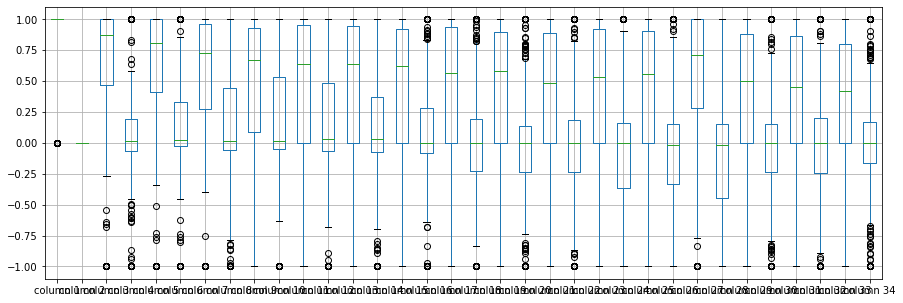

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.601068
column 6     0.115889
column 7     0.551333
column 8     0.119360
column 9     0.509239
column 10    0.181345
column 11    0.442258
column 12    0.155040
column 13    0.391477
column 14    0.093414
column 15    0.338934
column 16    0.065398
column 17    0.367006
column 18   -0.003617
column 19    0.372743
column 20   -0.024025
column 21    0.331472
column 22    0.011036
column 23    0.352066
column 24   -0.057406
column 25    0.405829
column 26   -0.071187
column 27    0.541641
column 28   -0.069538
column 29    0.368580
column 30   -0.027907
column 31    0.355029
column 32   -0.003537
column 33    0.348829
column 34    0.014480
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.221878,0.027079,0.173466,-0.051883,...,0.020635,0.149789,-0.203100,-0.010725,0.150043,-0.121415,0.148302,-0.127700,0.157720,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.432143,0.008717,0.448528,0.047916,...,0.306916,-0.073202,0.077911,0.123345,0.368524,0.057890,0.215533,-0.023966,0.257034,0.000584
column 4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.038857,0.255003,-0.285334,0.207697,...,-0.087273,-0.236987,-0.046910,0.000743,-0.037732,0.342301,-0.160041,-0.142362,-0.151348,0.034608
column 5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.574417,-0.029794,0.420425,-0.034236,...,0.255665,-0.032254,0.140899,0.184517,0.272317,0.051068,0.396348,0.031636,0.377114,-0.099478
column 6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.024962,0.274747,-0.149427,0.200080,...,-0.165477,0.041787,-0.175433,-0.068775,-0.025062,-0.158090,-0.133635,0.374736,-0.002698,0.185215
column 7,0.221878,NaN,0.432143,-0.038857,0.574417,-0.024962,1.000000,-0.145928,0.437022,-0.100673,...,0.242753,0.090566,0.075701,0.109900,0.280212,0.013689,0.403080,-0.025152,0.535815,-0.067077
column 8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.145928,1.000000,-0.352777,0.373567,...,-0.175931,-0.133023,-0.254130,0.072373,-0.146526,0.078585,-0.165967,0.136490,-0.210967,0.360610
column 9,0.173466,NaN,0.448528,-0.285334,0.420425,-0.149427,0.437022,-0.352777,1.000000,-0.261000,...,0.384361,0.135990,0.159434,0.175501,0.353236,-0.044316,0.305303,-0.036472,0.353070,-0.088194
column 10,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.100673,0.373567,-0.261000,1.000000,...,-0.267139,-0.043680,-0.250947,0.072018,-0.125495,-0.008578,-0.161557,-0.019802,-0.198882,0.098104


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [34,34+13,34+13+13,34+13+13+13,34+13+13+13+13,34+13+13+13,34+13+13,34+13,34], vae_layer = False, seed = 130)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.23896735055106
Epoch: 1 , loss: 19.211898894537065
Epoch: 2 , loss: 19.224321002051944
Epoch: 3 , loss: 19.085667246863956
Epoch: 4 , loss: 19.068534487769718
Epoch: 5 , loss: 19.032660348074778
Epoch: 6 , loss: 18.89340941111247
Epoch: 7 , loss: 18.93442944117955
Epoch: 8 , loss: 18.95911607288179
Epoch: 9 , loss: 18.83283805847168
Epoch: 10 , loss: 18.82662700471424
Epoch: 11 , loss: 18.735921587262833
Epoch: 12 , loss: 18.549686749776203
Epoch: 13 , loss: 18.478264490763348
Epoch: 14 , loss: 18.337120510282972
Epoch: 15 , loss: 18.048762548537482
Epoch: 16 , loss: 17.742626962207613
Epoch: 17 , loss: 17.028682254609606
Epoch: 18 , loss: 16.801079068865096
Epoch: 19 , loss: 16.64794663020543
Epoch: 20 , loss: 16.474298250107537
Epoch: 21 , loss: 16.564374605814617
Epoch: 22 , loss: 16.570282345726376
Epoch: 23 , loss: 16.334221976143972
Epoch: 24 , loss: 16.41664927346366
Epoch: 25 , loss: 16.7019

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7    -0.086527
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11   -0.072732
column 12    0.000000
column 13   -0.063740
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -0.063693
column 18   -1.000000
column 19   -0.064372
column 20    1.000000
column 21   -0.057024
column 22   -0.004370
column 23   -0.060095
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,-0.588579,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

13.118255134242968

In [18]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [19]:
NRMS=numerator/denominator
NRMS


0.19161879481992988

In [20]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.833980,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.108680,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.000000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.712160,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.332481,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.843490,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.934380,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.951770,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.956910,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [22]:
imputations[-1].to_excel("Ionosphere_AE_5(imp).xlsx", index=False, header=False)